In [61]:
import requests
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:



congress_url = "https://dadosabertos.camara.leg.br/api/v2/"
current_year = datetime.now().year
years = list(range(current_year, 2007, -1))



def get_all_congress_members_year(year):
    print(f'------------{year}------------')
    if not os.path.exists(f'data/deputados-{year}.json'):
        all_members_response = requests.get(f'{congress_url}/deputados')

        if(all_members_response.status_code == 200):
            with open(f'data/deputados-{year}.json', 'w', encoding='utf-8') as file:
                json.dump(all_members_response.json(), file, ensure_ascii=False)
    else:
        print(f'File for year {year} already exists. Exiting')



In [ ]:
for year in years:
    get_all_congress_members_year(year)

In [32]:
partidos_2008 = {}


with open('data/deputados-2008.json', 'r', encoding='utf-8') as file:
    data_2008 = json.load(file)

data = data_2008['dados']
for deputado in data:
    partido = deputado['siglaPartido']
    if partido not in partidos_2008:
        partidos_2008[partido] = 1
    else:
        partidos_2008[partido] += 1
    
print(partidos_2008)

{'MDB': 43, 'REPUBLICANOS': 44, 'PL': 92, 'PSDB': 13, 'NOVO': 4, 'PP': 50, 'PDT': 18, 'PT': 67, 'CIDADANIA': 4, 'UNIÃO': 59, 'PCdoB': 8, 'PV': 5, 'AVANTE': 7, 'PSD': 44, 'SOLIDARIEDADE': 5, 'PSB': 15, 'PODE': 14, 'PSOL': 13, 'S.PART.': 1, 'PRD': 5, 'REDE': 1}


In [ ]:
partidos_serie_historica = []

for year in years:
    print(year)
    with open(f'data/deputados-{year}.json', 'r', encoding='utf-8') as file:
        dado_ano = {}
        response = json.load(file)
        data = response['dados']
        for deputado in data:
            partido = deputado['siglaPartido']
            if partido not in dado_ano:
                dado_ano[partido] = 1
            else:
                dado_ano[partido] +=1
        partidos_serie_historica.append(dado_ano)
        

for partido in partidos_serie_historica:
    partidos_serie_historica_ordenado = dict(sorted(partido.items(), key=lambda item: item[1], reverse=True))



2025
2024
2023
2022
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
{'PL': 92, 'PT': 67, 'UNIÃO': 59, 'PP': 50, 'REPUBLICANOS': 44, 'PSD': 44, 'MDB': 43, 'PDT': 18, 'PSB': 15, 'PODE': 14, 'PSDB': 13, 'PSOL': 13, 'PCdoB': 8, 'AVANTE': 7, 'PV': 5, 'SOLIDARIEDADE': 5, 'PRD': 5, 'NOVO': 4, 'CIDADANIA': 4, 'S.PART.': 1, 'REDE': 1}


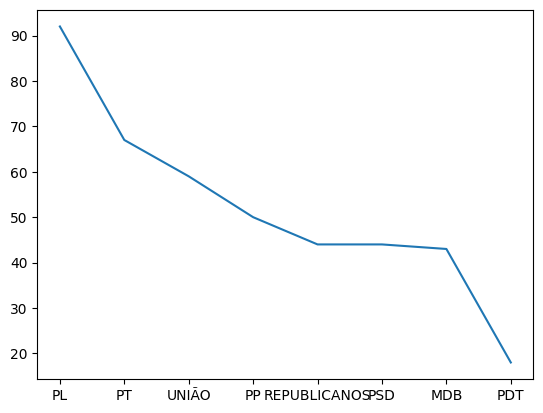

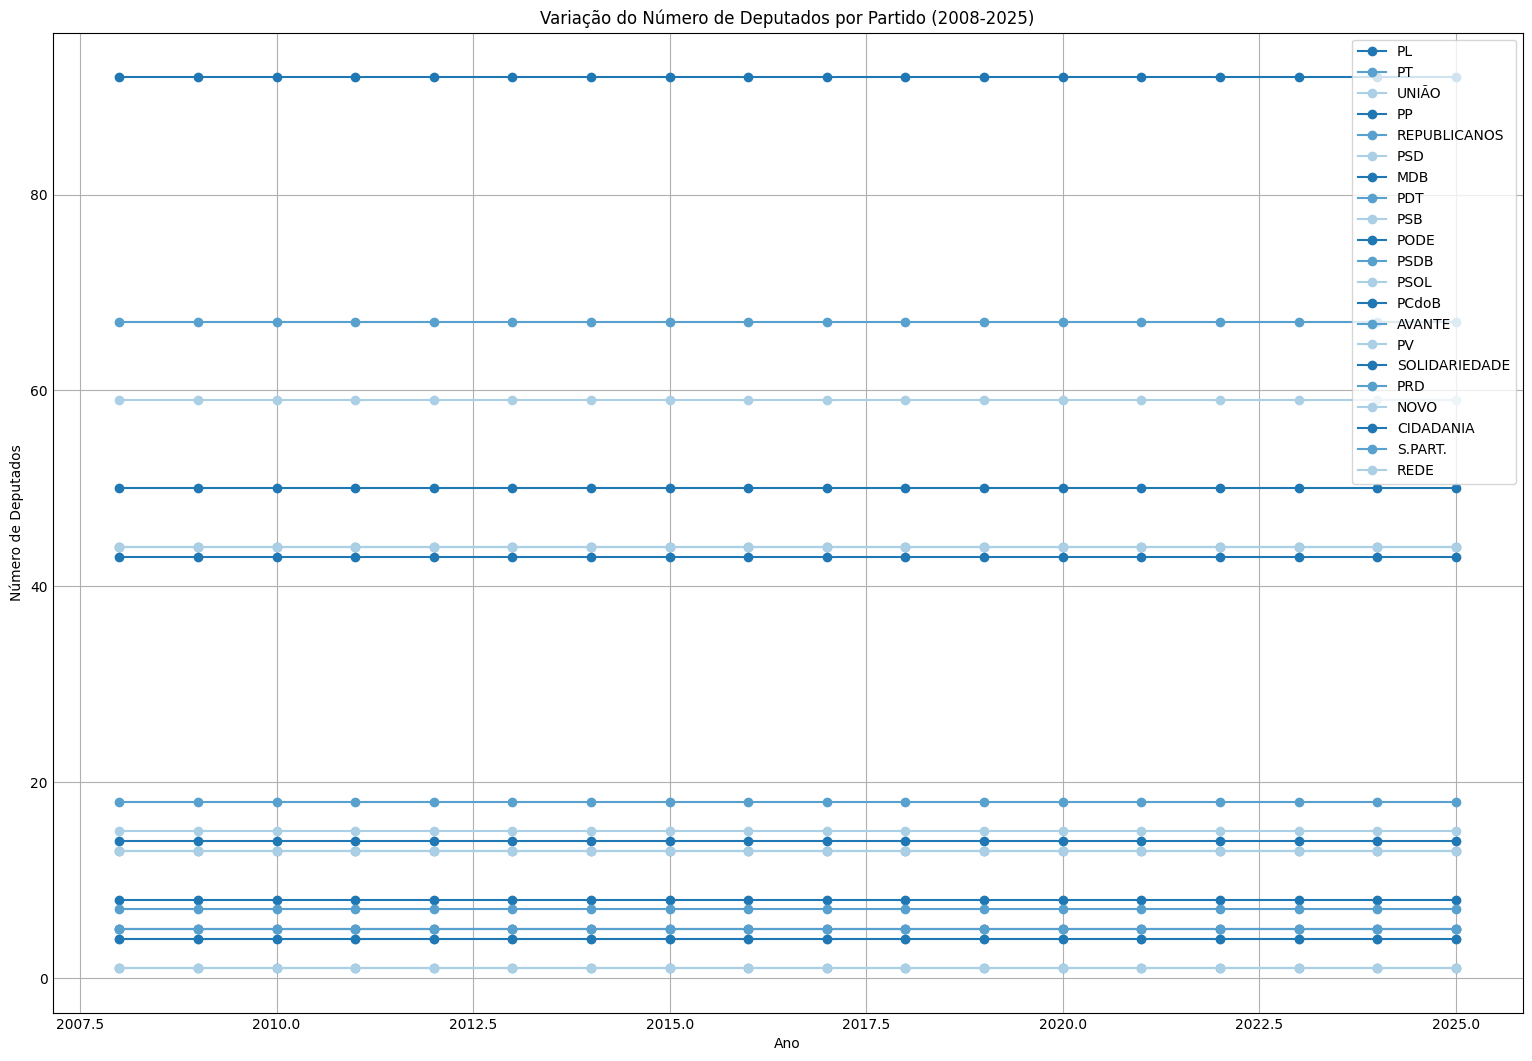

In [75]:
df = pd.DataFrame(partidos_serie_historica_ordenado, index=years)
plt.figure(figsize=(15, 10))

for partido in  df.columns:
    plt.plot(df.index, df[partido], marker='o', linestyle='-', label=partido)

plt.xlabel("Ano")
plt.ylabel("Número de Deputados")
plt.title("Variação do Número de Deputados por Partido (2008-2025)")
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()